In [814]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [815]:
#loading the data
df = pd.read_csv('taxi_out_time.csv')

In [816]:
#checking the missing values and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [817]:
# see the stats of the different column
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000,28820.000000
mean,7.894240,16.021096,4.008952,6.374983,225.288203,1267.746079,831.003851,828.934698,910.874289,41.489833,57.732616,12.367627,5.535323,30.092433,31.091256,28.432130,20.858570
std,4.991723,8.750179,1.985230,38.735144,119.482417,889.343246,299.398525,305.864103,345.411743,8.043533,23.468676,6.259298,11.886457,0.296160,9.510359,8.263043,6.851915
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1193.000000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [818]:
#df.isnull().sum()

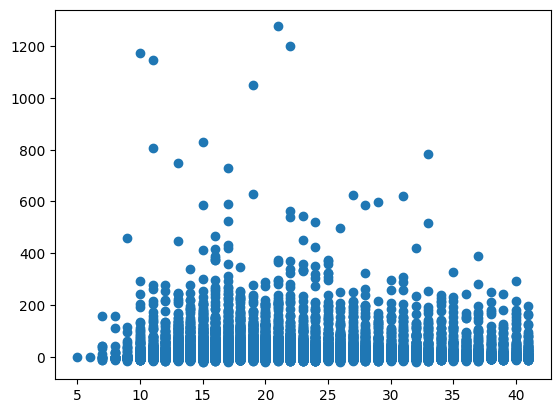

In [819]:
#checking the relationship between taxi-out time and flight delays
plt.scatter(df.TAXI_OUT,df.DEP_DELAY)

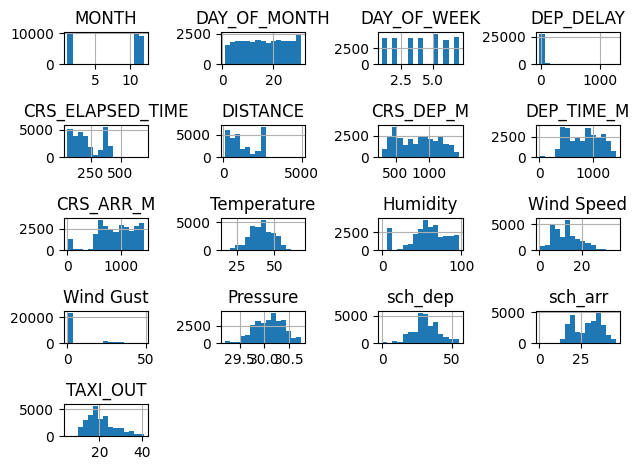

In [820]:
#to see the overall data distribution of all the variables
df1=df.select_dtypes(exclude=object)
df.hist(bins=15)
plt.tight_layout()


In [821]:
#checking correalation between different columns
df1.corr()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.000000,-0.007254,0.029365,0.046455,-0.016052,-0.000144,0.001824,0.002632,-0.012361,0.135682,0.012515,-0.035097,-0.051014,-0.085274,-0.006191,-0.019705,0.018505
DAY_OF_MONTH,-0.007254,1.000000,-0.029732,-0.036618,0.002761,-0.002762,0.001754,0.004446,0.008519,-0.132457,0.096215,-0.093211,-0.088991,0.016871,-0.003417,0.002223,-0.023990
DAY_OF_WEEK,0.029365,-0.029732,1.000000,-0.006203,0.000413,0.002450,0.005411,0.008256,-0.003339,0.013081,0.001627,0.095943,0.127689,0.102289,0.024415,0.009621,0.028388
DEP_DELAY,0.046455,-0.036618,-0.006203,1.000000,-0.030871,-0.031507,0.102384,0.072340,0.043691,-0.032261,-0.011776,0.067718,0.044340,-0.064939,-0.065452,-0.006949,0.034881
CRS_ELAPSED_TIME,-0.016052,0.002761,0.000413,-0.030871,1.000000,0.994465,-0.031332,-0.021391,0.035186,-0.016050,0.017198,-0.013440,-0.011934,0.010165,0.083426,-0.067669,0.070838
DISTANCE,-0.000144,-0.002762,0.002450,-0.031507,0.994465,1.000000,-0.040963,-0.034604,0.008520,-0.009923,0.015110,-0.010734,-0.009522,0.005692,0.059174,-0.088793,0.059856
CRS_DEP_M,0.001824,0.001754,0.005411,0.102384,-0.031332,-0.040963,1.000000,0.946023,0.452476,0.086371,0.003843,0.008063,-0.009887,-0.008285,-0.025621,0.495286,0.044864
DEP_TIME_M,0.002632,0.004446,0.008256,0.072340,-0.021391,-0.034604,0.946023,1.000000,0.469758,0.098105,-0.005923,0.006033,-0.014336,-0.009410,0.025609,0.544197,0.057896
CRS_ARR_M,-0.012361,0.008519,-0.003339,0.043691,0.035186,0.008520,0.452476,0.469758,1.000000,0.101620,-0.033163,0.014180,0.004486,-0.012682,0.149903,0.424209,0.071377
Temperature,0.135682,-0.132457,0.013081,-0.032261,-0.016050,-0.009923,0.086371,0.098105,0.101620,1.000000,0.054401,0.010603,-0.039487,-0.376730,-0.022534,0.075958,-0.067574


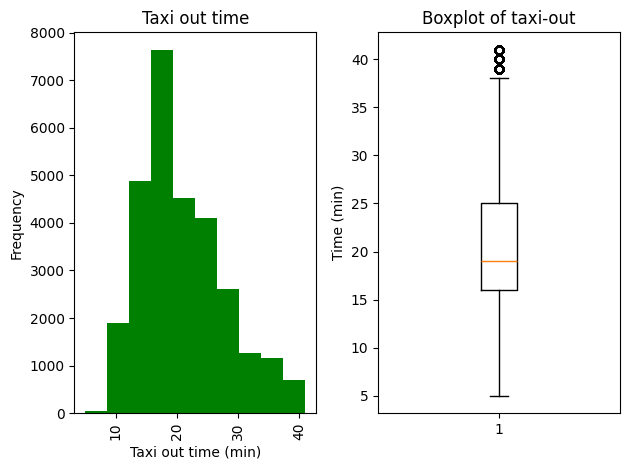

In [822]:
#looking data distribution of taxi-out time
plt.subplots(1,2)

plt.subplot(1,2,1)
plt.hist(df.TAXI_OUT, bins=10, color='g' )
plt.title('Taxi out time')
plt.xlabel('Taxi out time (min)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.boxplot(df.TAXI_OUT)
plt.title('Boxplot of taxi-out')
plt.ylabel('Time (min)')
plt.tight_layout();

In [823]:
#to check how many flight were delayed and deprted early
number_delay_filght=df[df.DEP_DELAY>0].DEP_DELAY.count()
number_early_filght= df[df.DEP_DELAY<0].DEP_DELAY.count()

In [824]:
delay_early=pd.DataFrame({'flight':['Early flight','Delayed flight'],'number':[number_early_filght, number_delay_filght]}, index=None)
delay_early

,flight,number
0,Early flight,19549
1,Delayed flight,7805


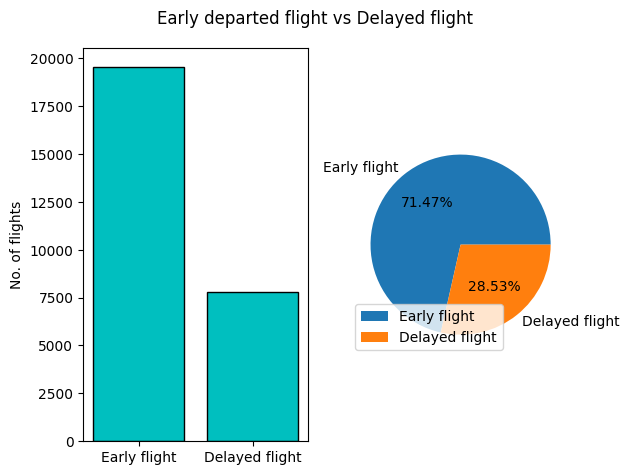

In [825]:
#plotting early and late flights
plt.subplots(1,2)
plt.suptitle('Early departed flight vs Delayed flight')

plt.subplot(1,2,1)
plt.bar(delay_early.flight, delay_early.number, color='c', edgecolor = 'Black')
#plt.title('Early departed flight vs Delayed flight')
plt.ylabel('No. of flights')

plt.subplot(1,2,2)
plt.pie(delay_early.number, autopct='%.2f%%', labels=delay_early.flight)
plt.legend(loc=3)
plt.tight_layout();

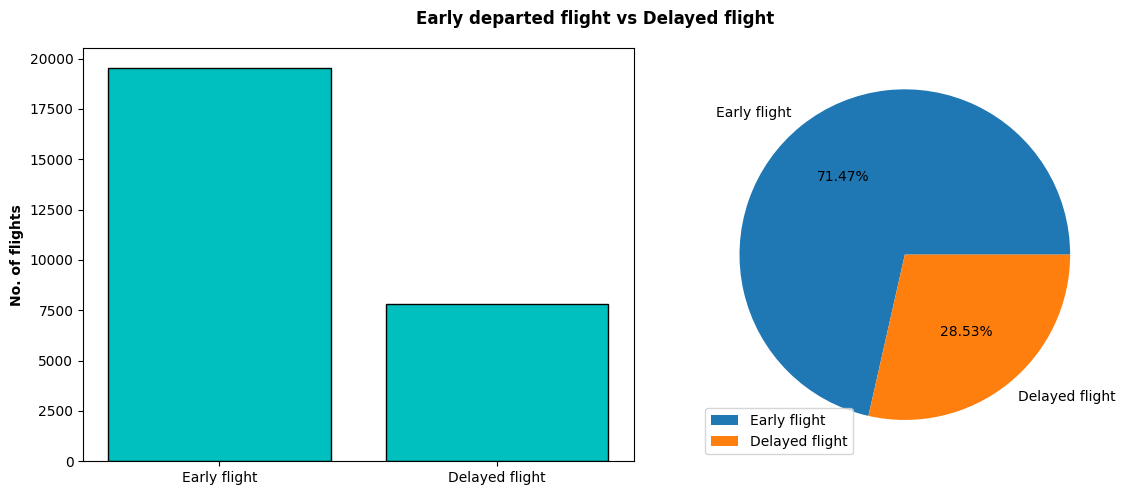

In [826]:
#plotting early and late flights through differently to learn more ways to draw a plot
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Early departed flight vs Delayed flight',fontweight='bold')

# Bar chart in first subplot
ax[0].bar(delay_early.flight, delay_early.number, color='c', edgecolor='black')
#axs[0].set_title('Early flight vs Delayed flight')
ax[0].set_ylabel('No. of flights',fontweight='bold')

# Pie chart in second subplot
ax[1].pie(delay_early.number, autopct='%.2f%%', labels=delay_early.flight)
ax[1].legend(loc=3)


plt.tight_layout()

In [827]:
month_number_df=df.groupby('MONTH').DEP_DELAY.mean().reset_index()
#wind_number_df1=wind_number_df.reset_index()
month_number_df



,MONTH,DEP_DELAY
0,1,4.306921
1,11,2.858123
2,12,12.339469


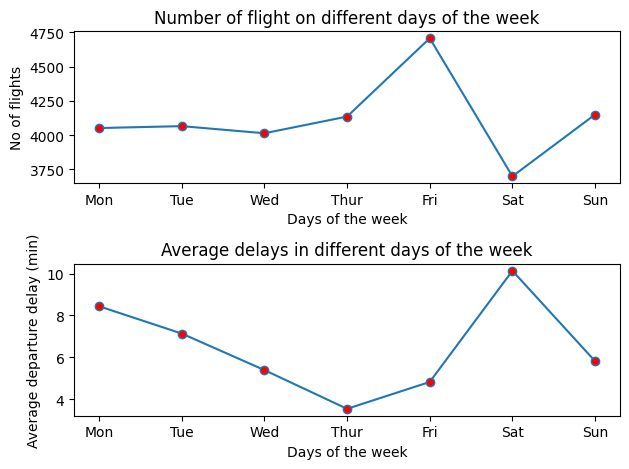

In [828]:
#plotting departure delays with days of the week
#plotting no. of flights on difeerent days of the week
plt.subplots(2,1)
plt.subplot(2,1,2)
week_df_delay =df.groupby('DAY_OF_WEEK').DEP_DELAY.mean().reset_index()
plt.plot(week_df_delay.DAY_OF_WEEK,week_df_delay.DEP_DELAY, marker ='o', mfc='red')
plt.title('Average delays in different days of the week')
plt.xlabel('Days of the week')
plt.ylabel('Average departure delay (min)')
plt.xticks(week_df_delay.DAY_OF_WEEK,('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.subplot(2,1,1)
week_df =df.groupby('DAY_OF_WEEK').TAXI_OUT.count().reset_index()
plt.plot(week_df.DAY_OF_WEEK,week_df.TAXI_OUT, marker ='o', mfc='red')
plt.title('Number of flight on different days of the week')
plt.xlabel('Days of the week')
plt.ylabel('No of flights')
plt.xticks(week_df.DAY_OF_WEEK,('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.tight_layout();

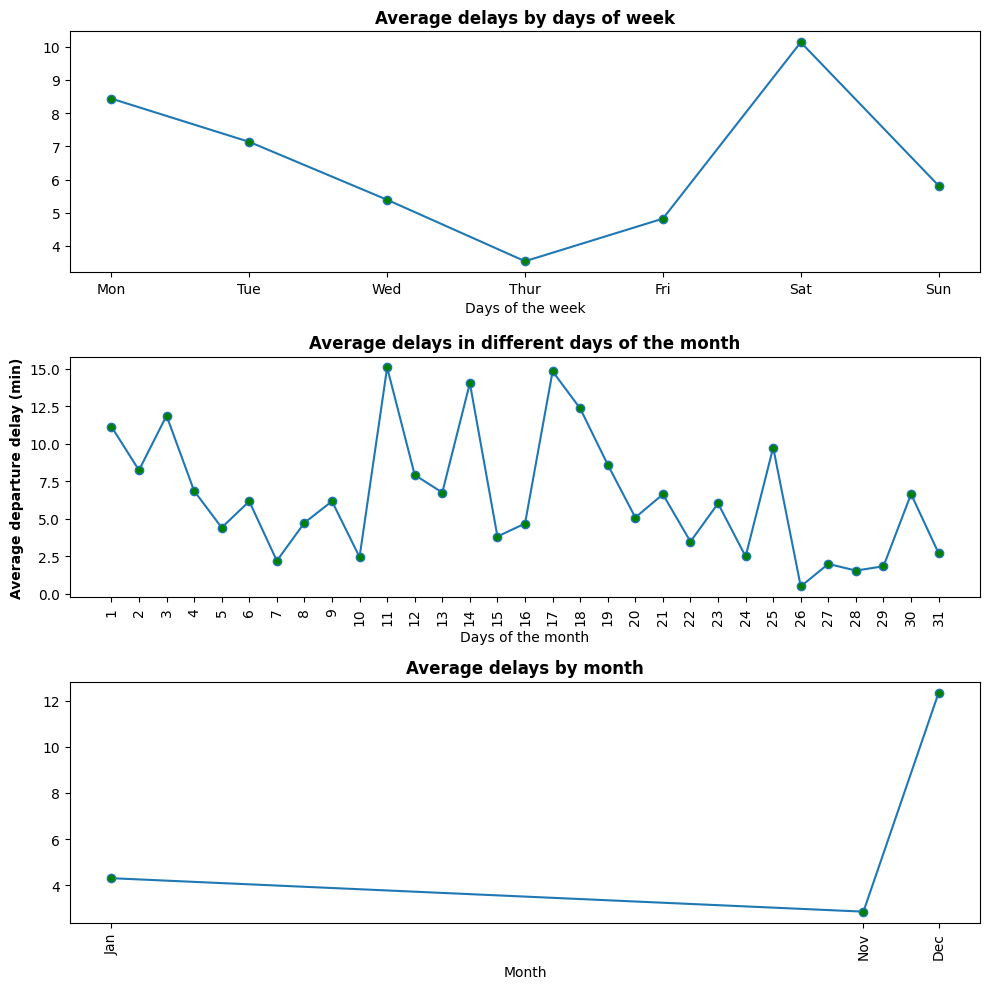

In [829]:
#Plotting average delays by days, week and months
plt.subplots(3,1, figsize=(10,10))


plt.subplot(3,1,1)
week_df_delay =df.groupby('DAY_OF_WEEK').DEP_DELAY.mean().reset_index()
plt.plot(week_df_delay.DAY_OF_WEEK,week_df_delay.DEP_DELAY, marker ='o', mfc='g')
plt.title('Average delays by days of week',fontweight='bold')
plt.xlabel('Days of the week')
#plt.ylabel('Average de)
plt.xticks(week_df.DAY_OF_WEEK,('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))

plt.subplot(3,1,2)
month_df_delay =df.groupby('DAY_OF_MONTH').DEP_DELAY.mean().reset_index()
plt.plot(month_df_delay.DAY_OF_MONTH,month_df_delay.DEP_DELAY, marker ='o',mfc='g')
plt.title('Average delays in different days of the month',fontweight='bold')
plt.xlabel('Days of the month')
plt.ylabel('Average departure delay (min)',fontweight='bold')
plt.xticks(month_df_delay.DAY_OF_MONTH,range(1,32), rotation=90)

plt.subplot(3,1,3)
month_number_df==df.groupby('MONTH').DEP_DELAY.mean().reset_index()
plt.plot(month_number_df.MONTH,month_number_df.DEP_DELAY,marker ='o',mfc='g')
plt.title('Average delays by month',fontweight='bold')
plt.xlabel('Month')
#plt.ylabel('Average departure delay (min)')
plt.xticks(month_number_df.MONTH,['Jan', 'Nov', 'Dec'], rotation=90)
plt.tight_layout();


Text(0, 0.5, 'Taxi out time (min)')

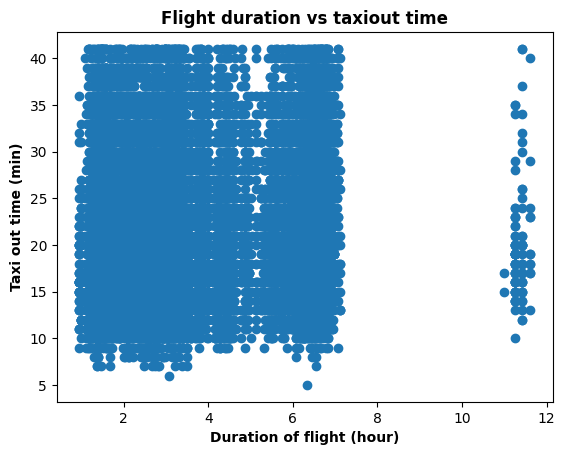

In [830]:
#to check if any relationship occurs between flight duration and taxitime
plt.scatter(df.CRS_ELAPSED_TIME/60,df.TAXI_OUT)
plt.title('Flight duration vs taxiout time',fontweight='bold')
plt.xlabel('Duration of flight (hour)',fontweight='bold')
plt.ylabel('Taxi out time (min)',fontweight='bold')
#plt.xticks(df.CRS_ELAPSED_TIME/60,range(1,13), rotation=90)


In [831]:
# checking the numbers of different flights of different company
airlines_df=df.groupby('OP_UNIQUE_CARRIER').TAXI_OUT.count().reset_index()
airlines_df

,OP_UNIQUE_CARRIER,TAXI_OUT
0,9E,4485
1,AA,3595
2,AS,1111
3,B6,9589
4,DL,7680
5,HA,90
6,MQ,1045
7,OO,311
8,YX,914


Text(0, 0.5, 'No. of flights')

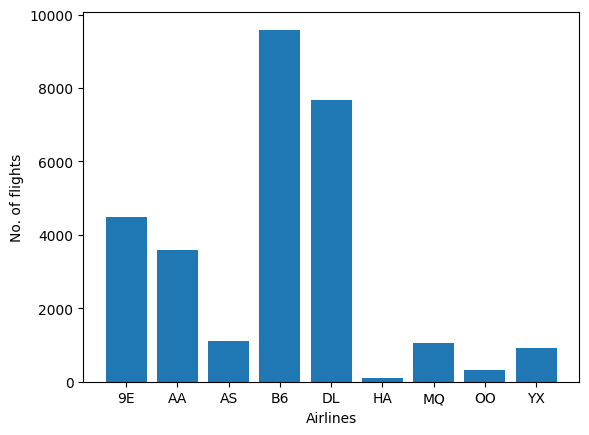

In [832]:
#plotting different number flights vs different airlines
plt.bar(airlines_df.OP_UNIQUE_CARRIER, airlines_df.TAXI_OUT)
plt.xlabel('Airlines')
plt.ylabel('No. of flights')
#JetBlue Airways=B6,DL=	Delta Air Lines,

In [833]:
#define the data for prediction
airlines_df_delay=df.groupby('OP_UNIQUE_CARRIER').DEP_DELAY.mean().reset_index()
airlines_df_delay

,OP_UNIQUE_CARRIER,DEP_DELAY
0,9E,5.374805
1,AA,5.450348
2,AS,5.103510
3,B6,8.108979
4,DL,5.463151
5,HA,0.755556
6,MQ,5.553110
7,OO,16.639871
8,YX,3.935449


Text(0, 0.5, 'Departure delays (min)')

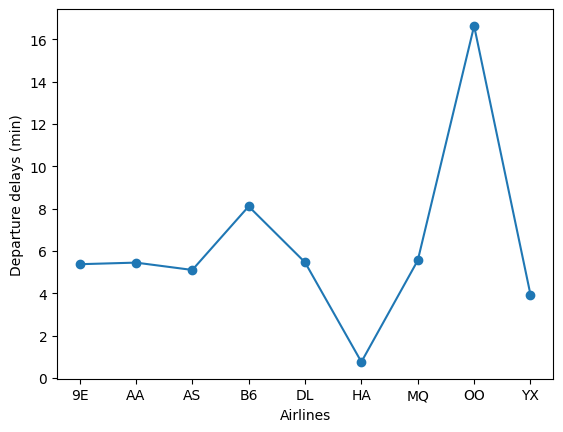

In [834]:
#Plotting different airlines and their delays
plt.plot(airlines_df_delay.OP_UNIQUE_CARRIER,airlines_df_delay.DEP_DELAY, marker='o')
plt.xlabel('Airlines')
plt.ylabel('Departure delays (min)')

In [835]:
condition_df=df.groupby('Condition').DEP_DELAY.mean().reset_index()
condition_df1=df.groupby('Condition').TAXI_OUT.mean().reset_index()
#condition_df1

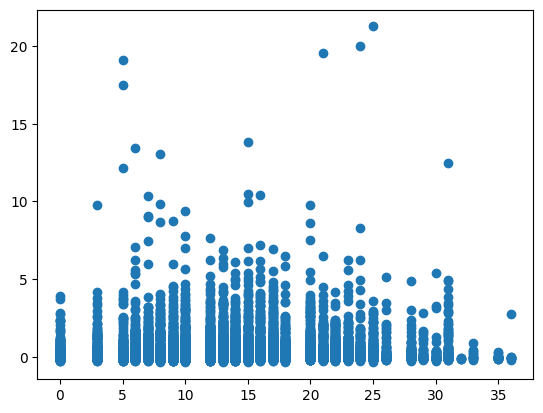

In [836]:
#checking the relationship between wind speed and departure delays
plt.scatter(df['Wind Speed'],df.DEP_DELAY/60)

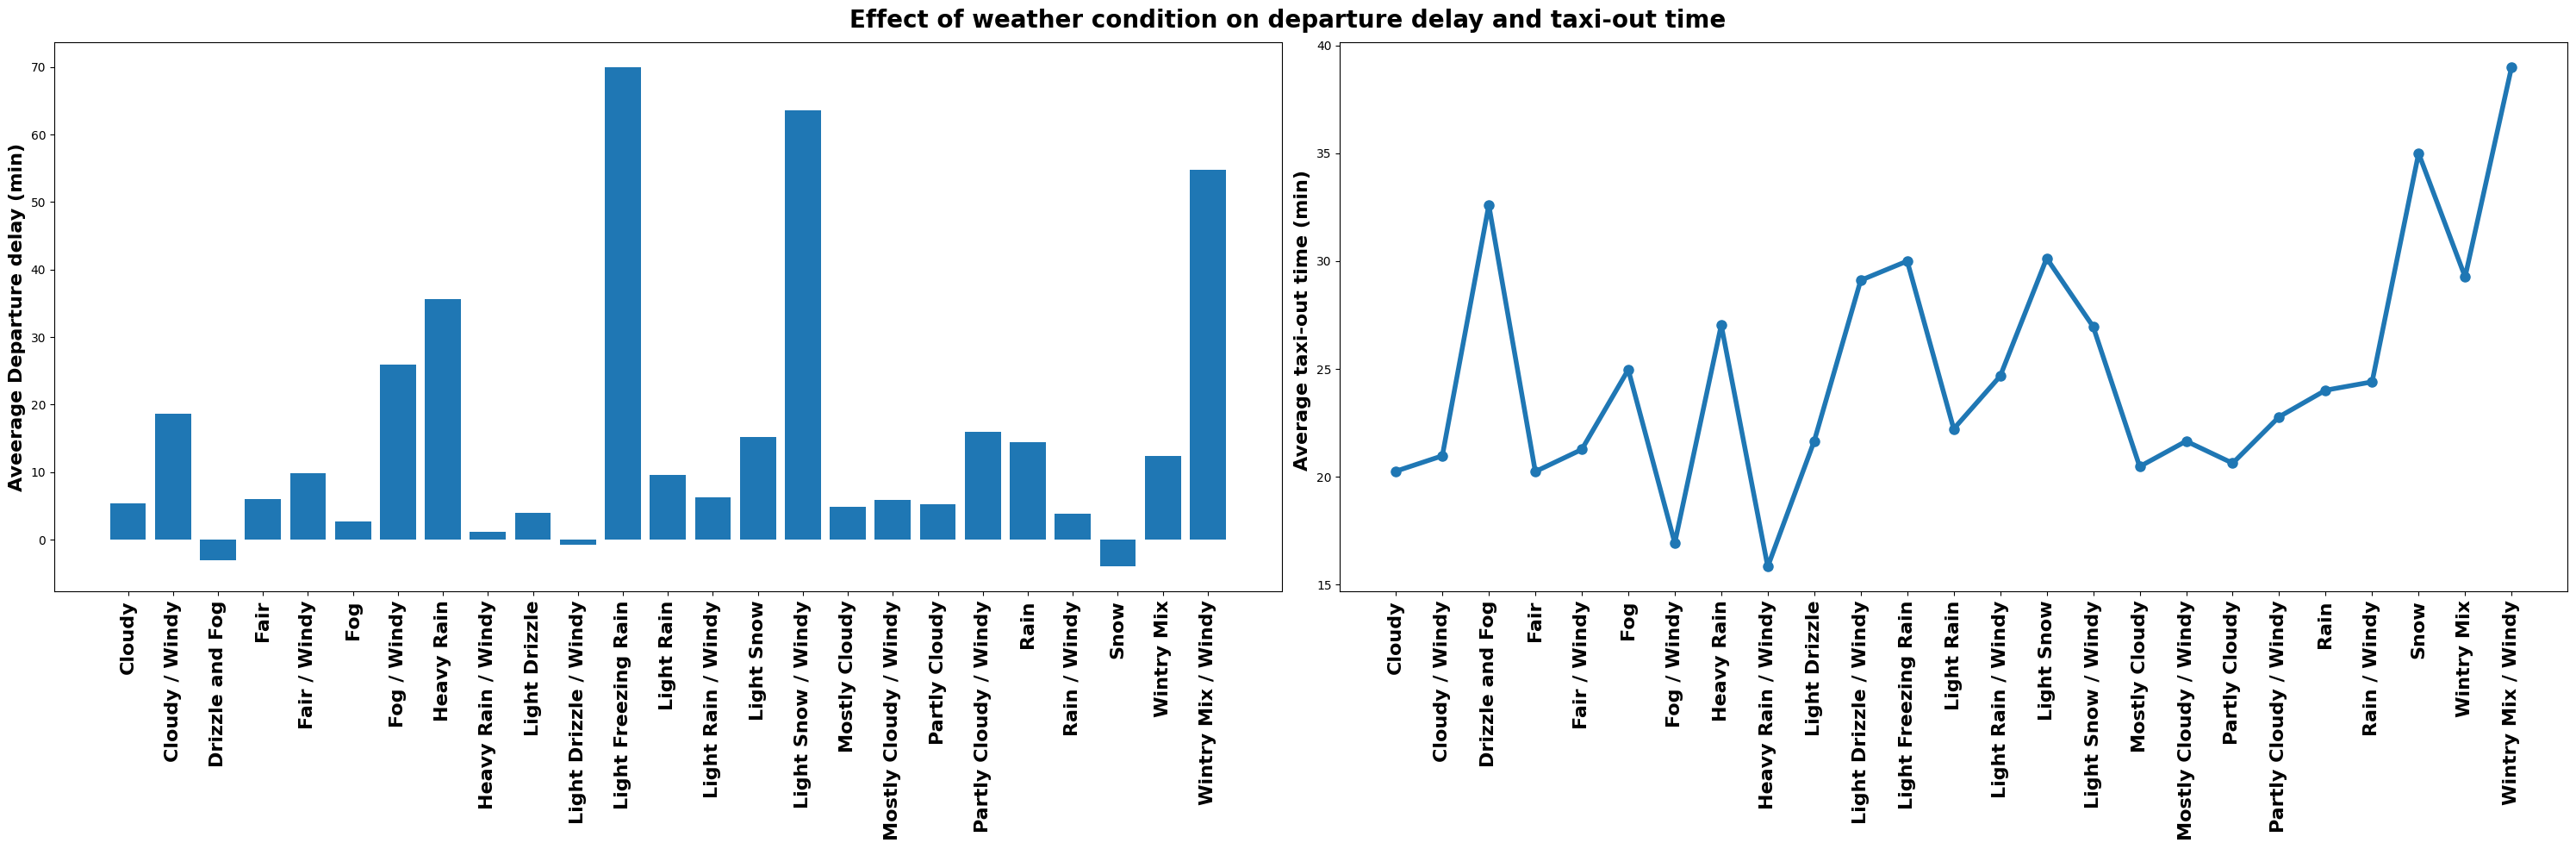

In [837]:
#plotting Effect of weather condition on departure delay and taxi-out time
plt.subplots(1,2, figsize=(30,10))
plt.subplot(1,2,1)
plt.suptitle('Effect of weather condition on departure delay and taxi-out time', fontsize=20, fontweight='bold')
plt.bar(condition_df.Condition,condition_df.DEP_DELAY)
plt.ylabel('Aveerage Departure delay (min)',fontweight='bold', fontsize=16 )
plt.xticks(rotation=90,fontweight='bold',fontsize=16)
plt.subplot(1,2,2)
plt.plot(condition_df1.Condition,condition_df1.TAXI_OUT, lw=4,marker ='o', ms=8)
plt.ylabel('Average taxi-out time (min) ',fontweight='bold',fontsize=16 )
plt.xticks(rotation=90,fontweight='bold',fontsize=16)
plt.tight_layout()

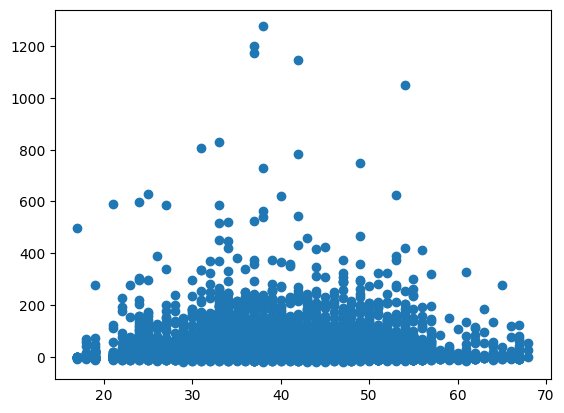

In [838]:
#plotting effect of temperature on departure delay
plt.scatter(df.Temperature, df.DEP_DELAY)

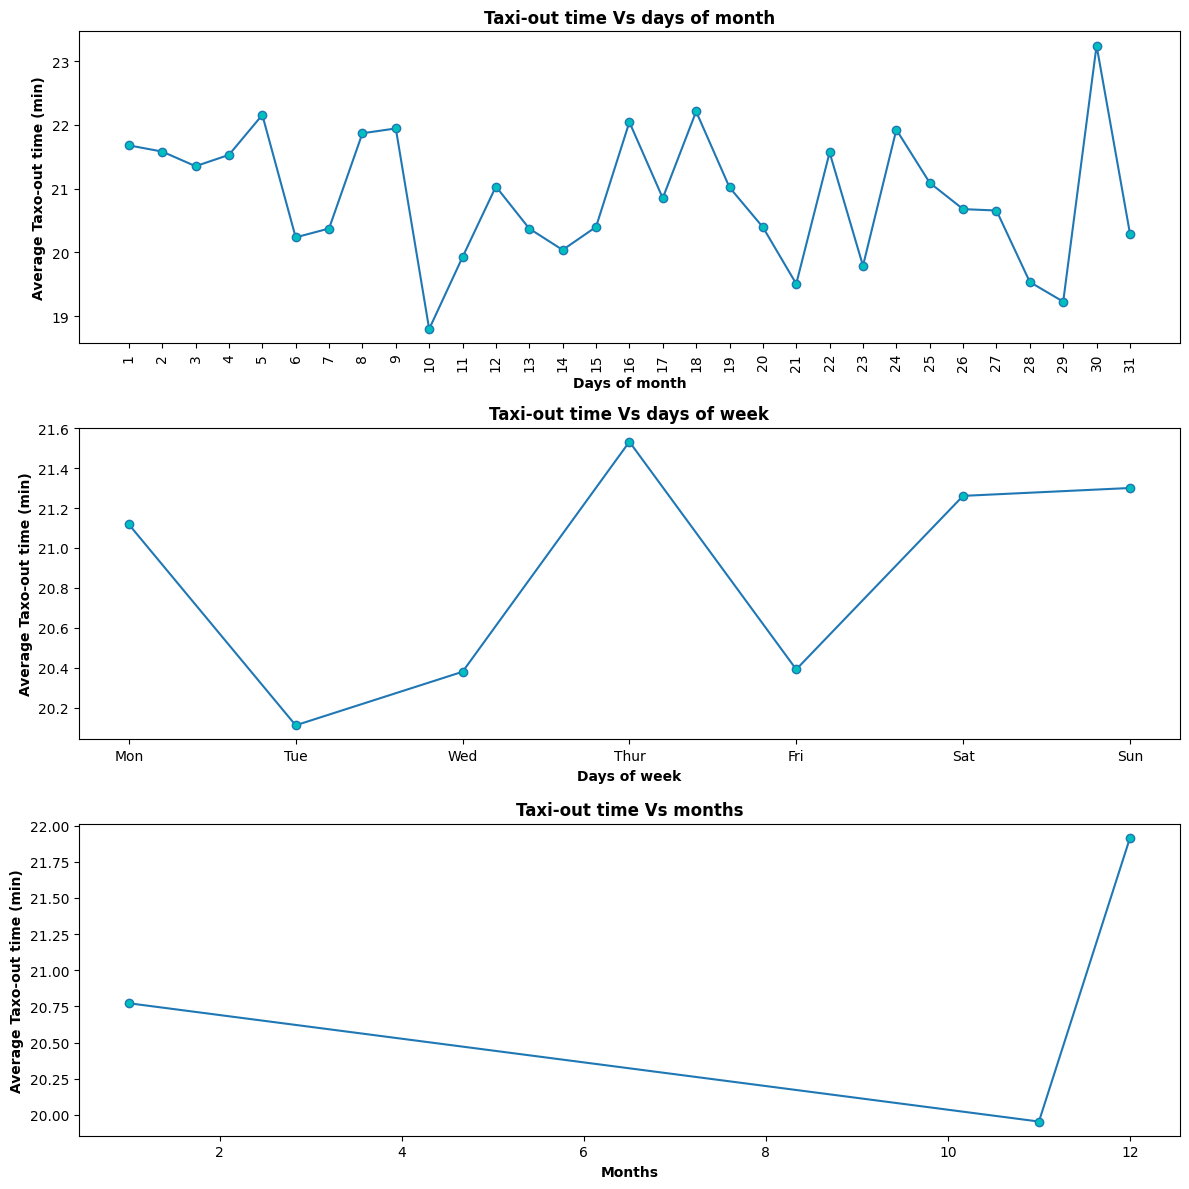

In [839]:
#plotting taxi out time by days week and month
plt.subplots(3,1, figsize=(12,12))
plt.subplot(3,1,1)
days_df =df.groupby('DAY_OF_MONTH').TAXI_OUT.mean().reset_index()
plt.plot(days_df.DAY_OF_MONTH, days_df.TAXI_OUT, marker ='o', mfc='c')
plt.xticks(days_df.DAY_OF_MONTH,range(1,32), rotation=90)
plt.xlabel('Days of month',fontweight='bold')
plt.ylabel('Average Taxo-out time (min)',fontweight='bold')
plt.title('Taxi-out time Vs days of month',fontweight='bold')
plt.subplot(3,1,2)
days_of_week =df.groupby('DAY_OF_WEEK').TAXI_OUT.mean().reset_index()
plt.plot(days_of_week.DAY_OF_WEEK, days_of_week.TAXI_OUT, marker ='o', mfc='c')
plt.xlabel('Days of week', fontweight='bold')
plt.ylabel('Average Taxo-out time (min)',fontweight='bold')
plt.title('Taxi-out time Vs days of week',fontweight='bold')
plt.xticks(week_df.DAY_OF_WEEK,('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'))
plt.subplot(3,1,3)
month_of_year =df.groupby('MONTH').TAXI_OUT.mean().reset_index()
plt.plot(month_of_year.MONTH, month_of_year.TAXI_OUT, marker ='o', mfc='c')
plt.xlabel('Months', fontweight='bold')
plt.ylabel('Average Taxo-out time (min)',fontweight='bold')
plt.title('Taxi-out time Vs months',fontweight='bold')
plt.tight_layout();

In [840]:
#Buiding a simple linear ression model
x=df['Temperature'].values.reshape(-1,1)
y=df['TAXI_OUT'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=32)

In [841]:
#Splitting the data to make training and testing data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)
#making the model
lin_reg=LinearRegression()
#filling the data into model
lin_reg.fit(x_train,y_train)
#predicting the result
y_pred =lin_reg.predict(x_test)
pred_df=pd.DataFrame({'Actual_valu':y_test.flatten(), 'Predicted_value':y_pred.flatten()})
pred_df

,Actual_valu,Predicted_value
0,23,21.348910
1,14,23.129726
2,22,22.507476
3,19,24.130208
4,20,19.089575
...,...,...
5759,18,20.142936
5760,16,19.094805
5761,34,22.195916
5762,17,20.212702


In [842]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.467673604424033
MSE: 46.12722386302466
RMSE: 6.7917025746880775
R2: 0.037603906447743474


In [843]:
#builing multi-linear regression model
X=df[['CRS_ELAPSED_TIME','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure']]
y=df['TAXI_OUT']


In [844]:
#Spliting the data into training and testing data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)


In [845]:
#Scaling the data
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [846]:
#Building model And fitting the data inti the model
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [847]:
#Predicting the result
y_pred =lin_reg.predict(x_test)


In [848]:
#Showing the result
pred_df=pd.DataFrame({'Actual Taxi-out time':y_test, 'Predicted Taxi-out time':y_pred.flatten()})
pred_df

,Actual Taxi-out time,Predicted Taxi-out time
9362,23,21.348910
23840,14,23.129726
24617,22,22.507476
24899,19,24.130208
2007,20,19.089575
...,...,...
25685,18,20.142936
376,16,19.094805
10922,34,22.195916
7106,17,20.212702


In [849]:
#Evaluating the model
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))


MAE: 5.467673604424044
MSE: 46.12722386302466
RMSE: 6.7917025746880775
R2: 0.037603906447743474


In [850]:
# regression model based on Ridge and Lasso
X=df[['CRS_ELAPSED_TIME','Temperature','Dew Point','Humidity','Wind Speed','Wind Gust','Pressure']].values
y=df['TAXI_OUT'].values
y

array([14, 15, 22, ..., 21, 13, 15], shape=(28820,))

In [851]:

model_lasso=Lasso(alpha=1.0)
model_ridge=Ridge(alpha=1.0)

In [852]:
# splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [853]:
model_lasso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [854]:
#predicting result with lasso
predict_lasso = model_lasso.predict(X_test)
predict_lasso

array([21.29508076, 22.77704965, 22.39230729, ..., 21.91259527,
       19.88997997, 20.88891751], shape=(5764,))

In [855]:
# Evaluating the result
print('MAE:', metrics.mean_absolute_error(y_test, predict_lasso))
print('MSE:', metrics.mean_squared_error(y_test, predict_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_lasso)))
print('R2:', metrics.r2_score(y_test, predict_lasso))

MAE: 5.473475365233034
MSE: 46.29828865683032
RMSE: 6.804284580823345
R2: 0.03403481913844064


In [856]:
#Making data frame to better see the result
pred_df1=pd.DataFrame({'Actual Taxi-out time (Lasso)' :y_test.flatten(), 'Predicted Taxi-out time (Lasso)':predict_lasso.flatten()})
#pred_df1

In [857]:
##predicting result with ridge
predict_ridge = model_ridge.predict(X_test)
#predict_ridge

In [858]:
#Making data frame to better see the result
pred_df2=pd.DataFrame({'Actual Taxi-out time (Ridge)' :y_test.flatten(), 'Predicted Taxi-out time (Ridge)':predict_ridge.flatten()})
pred_df2

,Actual Taxi-out time (Ridge),Predicted Taxi-out time (Ridge)
0,23,21.348909
1,14,23.129798
2,22,22.507393
3,19,24.130227
4,20,19.089623
...,...,...
5759,18,20.142977
5760,16,19.094804
5761,34,22.195909
5762,17,20.212686


In [859]:
# Evaluating the result
print('MAE:', metrics.mean_absolute_error(y_test, predict_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predict_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predict_ridge)))
print('R2:', metrics.r2_score(y_test, predict_ridge))

MAE: 5.467673318291567
MSE: 46.127235802385215
RMSE: 6.791703453654702
R2: 0.03760365734552151
